In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
resumeDataSet = pd.read_csv(r"/home/shreyash/Desktop/datasets_118409_284260_resume_dataset.csv")
resumeDataSet['filtered_resume'] = ''
resumeDataSet.head()

,Category,Resume,filtered_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
print ("Displaying the distinct categories of resume-")
print (resumeDataSet['Category'].unique())


Displaying the distinct categories of resume-
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category-")
print (resumeDataSet['Category'].value_counts())




Displaying the distinct categories of resume and the number of records belonging to each category-
Java Developer               14
HR                           11
Database                     11
Data Science                 10
Advocate                     10
Testing                       7
Hadoop                        7
DotNet Developer              7
Automation Testing            7
DevOps Engineer               7
Arts                          6
Python Developer              6
SAP Developer                 6
Health and fitness            6
Business Analyst              6
Civil Engineer                6
ETL Developer                 5
Network Security Engineer     5
Web Designing                 5
Blockchain                    5
Mechanical Engineer           5
Sales                         5
Electrical Engineering        5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


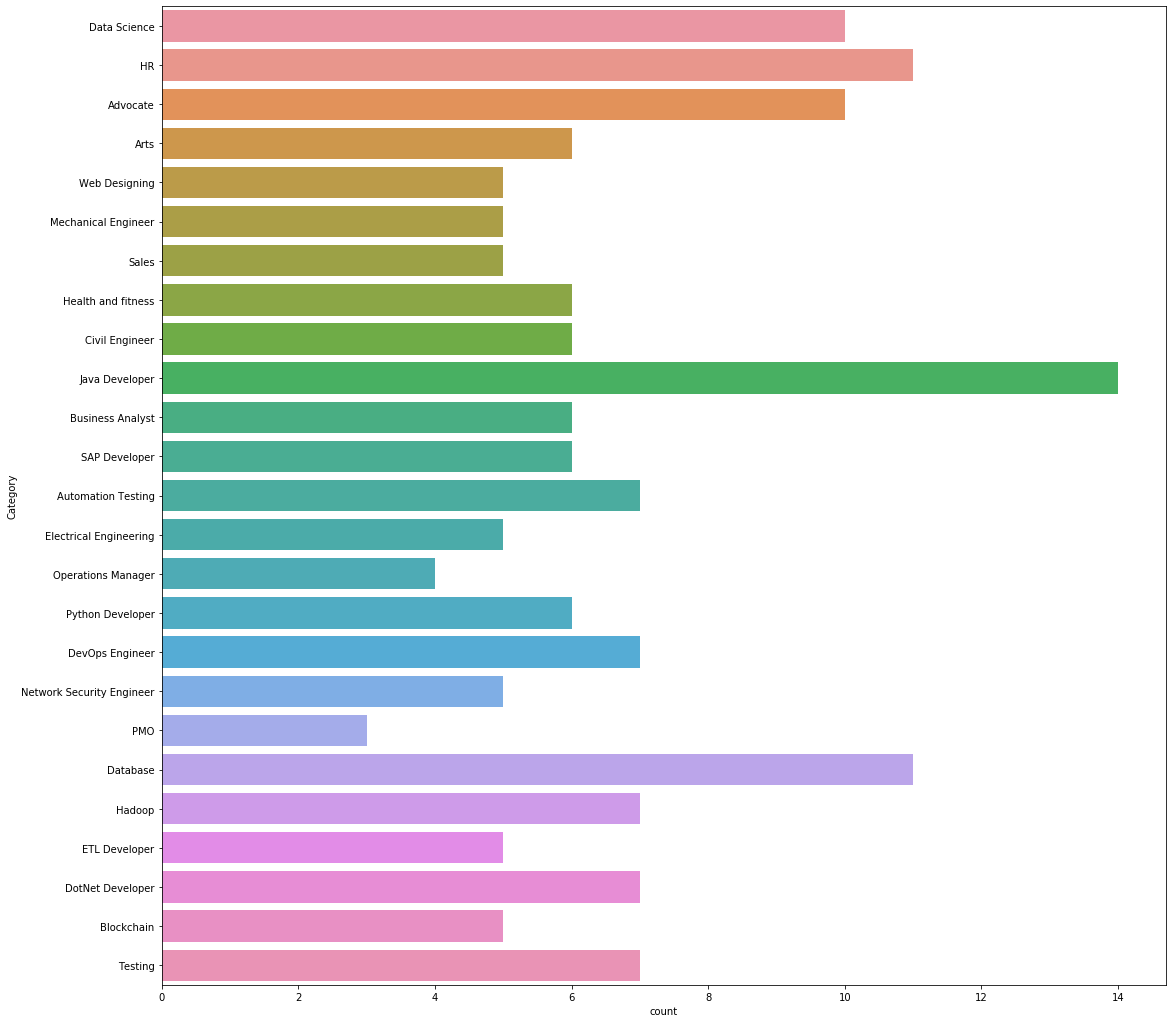

In [5]:
import seaborn as sns
plt.figure(figsize=(18,18))
plt.xticks(rotation=0)
sns.countplot(y="Category", data=resumeDataSet)


In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  
    resumeText = re.sub('RT|cc', ' ', resumeText)  
    resumeText = re.sub('#\S+', '', resumeText) 
    resumeText = re.sub('@\S+', '  ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  
    resumeText = re.sub('\s+', ' ', resumeText)
    resumeText = re.sub('â¢', ' ', resumeText)
    return resumeText

In [7]:
resumeDataSet['filtered_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print (resumeDataSet['filtered_resume'][10])

TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ SPSSEducation Details January 2017 MBA Chidambaram Tamil Nadu SNS College of Engineering January 2014 HSC at SAV Higher Secondary School MBA SNS College of Engineering SSLC Finance at Kamaraj Matriculation SchoolHRSkill Details Human resource Finance Exprience Less than 1 year monthsCompany Details company description 


In [8]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['filtered_resume'].values
requiredTarget = resumeDataSet['Category'].values


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


Feature completed .....
(135, 1500)
(34, 1500)


In [10]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))




Accuracy of KNeighbors Classifier on training set: 0.89
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
         

In [11]:
resumeDataSet = pd.read_csv(r"/home/shreyash/Desktop/datasets_118409_284260_resume_dataset.csv")
resumeDataSet['Domain'] = ''
resumeDataSet.head()

,Category,Resume,Domain
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [12]:
def mapCategory(category):
    if category == 'Civil Engineer':
        return "Civil Engineer"
    elif category == "Electrical Engineering":
        return "Electrical Engineering"
    elif category == "HR":
        return "HR"
    elif category == "Health and fitness":
        return "Health and fitness"
    elif category == "Business Analyst":
        return "Business Analyst"
    elif category == "Mechanical Engineer":
        return "Mechanical Engineer"
    elif category == "Arts":
        return "Arts"
    elif category == "PMO":
        return "PMO"
    elif category == "NONE":
        return "others"
    else:
        return "Information Technlogy"


resumeDataSet['Domain'] = resumeDataSet.Category.apply(lambda x: mapCategory(x))
print (resumeDataSet.head(20))

        Category                                             Resume  \
0   Data Science  Skills * Programming Languages: Python (pandas...   
1   Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2   Data Science  Areas of Interest Deep Learning, Control Syste...   
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4   Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
7   Data Science  Education Details \r\n B.Tech   Rayat and Bahr...   
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...   
9   Data Science  Expertise â Data and Quantitative Analysis â...   
10            HR  TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ ...   
11            HR  I.T. Skills â¢ Windows XP, Ms Office (Word, E...   
12            HR  Education Details \r\n BA   mumbai UniversityH...   
13    

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['Category'].values
requiredTarget = resumeDataSet['Domain'].values


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(135, 34)
(34, 34)


In [14]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.91

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
                        precision    recall  f1-score   support

                  Arts       1.00      1.00      1.00         1
        Civil Engineer       1.00      1.00      1.00         1
Electrical Engineering       0.00      0.00      0.00         3
    Health and fitness       1.00      1.00      1.00         3
 Information Technlogy       0.89      1.00      0.94        25
   

In [15]:
import pickle 

In [16]:
with open('resumeDataSet_pickle.pkl', 'wb') as file:
    pickle.dump(resumeDataSet,file)

In [17]:
with open('resumeDataSet_pickle.pkl','rb') as f:
    jp = pickle.load(f)

In [18]:
print (resumeDataSet['Category'].value_counts())

Java Developer               14
HR                           11
Database                     11
Data Science                 10
Advocate                     10
Testing                       7
Hadoop                        7
DotNet Developer              7
Automation Testing            7
DevOps Engineer               7
Arts                          6
Python Developer              6
SAP Developer                 6
Health and fitness            6
Business Analyst              6
Civil Engineer                6
ETL Developer                 5
Network Security Engineer     5
Web Designing                 5
Blockchain                    5
Mechanical Engineer           5
Sales                         5
Electrical Engineering        5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


In [19]:
print (resumeDataSet.head(50))

               Category                                             Resume  \
0          Data Science  Skills * Programming Languages: Python (pandas...   
1          Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2          Data Science  Areas of Interest Deep Learning, Control Syste...   
3          Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4          Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
5          Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   
6          Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
7          Data Science  Education Details \r\n B.Tech   Rayat and Bahr...   
8          Data Science  Personal Skills â¢ Ability to quickly grasp t...   
9          Data Science  Expertise â Data and Quantitative Analysis â...   
10                   HR  TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ ...   
11                   HR  I.T. Skills â¢ Windows XP, Ms Office (